In [85]:
!pip install fbprophet
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for fbprophet ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> fbprophet

note: This is an issue with the package mentioned above, not pip.
hint: See

In [86]:
# Python
import pandas as pd
import matplotlib.pyplot as plt 
from prophet import Prophet
# Python
df = pd.read_csv('Youtube.csv')

In [87]:
prediction = pd.DataFrame()
prediction_days   = 180
for step in range(prediction_days, 5, -5):
  #m = Prophet()
  m = Prophet(  interval_width=1,
                growth='linear',
                seasonality_mode='multiplicative', 
                daily_seasonality=True, 
                yearly_seasonality = True, 
                weekly_seasonality = True
              )
  m.fit(df.head(len(df)-step))
  future = m.make_future_dataframe(periods=5)
  forecast = m.predict(future)
  prediction  = prediction.append(forecast.tail(5))

In [88]:
"""
# Python
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
"""

'\n# Python\nimport itertools\nfrom prophet.diagnostics import cross_validation\nfrom prophet.diagnostics import performance_metrics\n\nparam_grid = {  \n    \'changepoint_prior_scale\': [0.001, 0.01, 0.1, 0.5],\n    \'seasonality_prior_scale\': [0.01, 0.1, 1.0, 10.0],\n}\n\n# Generate all combinations of parameters\nall_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]\nrmses = []  # Store the RMSEs for each params here\n\n# Use cross validation to evaluate all parameters\nfor params in all_params:\n    m = Prophet(**params).fit(df)  # Fit model with given params\n    df_cv = cross_validation(m, horizon=\'30 days\', parallel="processes")\n    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon=\'30 days\', parallel="processes")\n    df_p = performance_metrics(df_cv, rolling_window=1)\n    rmses.append(df_p[\'rmse\'].values[0])\n\n# Find the best parameters\ntuning_results = pd.DataFrame(all_params)\ntuning_results[\'rmse\'] = rmses\nprint(tu

In [89]:
"""
# Python
import numpy as np
best_params = all_params[np.argmin(rmses)]
print(best_params)
"""

'\n# Python\nimport numpy as np\nbest_params = all_params[np.argmin(rmses)]\nprint(best_params)\n'

In [90]:
df['ds'] = pd.to_datetime(df['ds'])

In [91]:
result  = pd.merge(df, prediction, on = "ds", how = "inner")

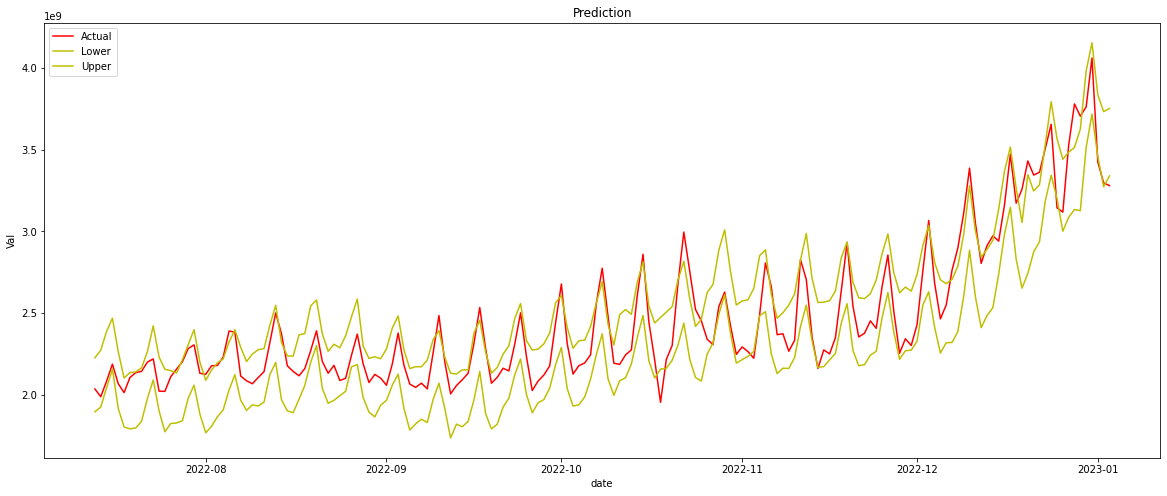

In [92]:
#result = result.tail(60)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
# plot two lines
plt.plot(result['ds'], result['y'], 'r')
#plt.plot(result['ds'], result['yhat'], 'r')
plt.plot(result['ds'], result['yhat_lower'], 'y')
plt.plot(result['ds'], result['yhat_upper'], 'y')
# set axis titles
plt.xlabel("date")
plt.ylabel("Val")
# set chart title
plt.title("Prediction")
# legend
#plt.legend(['Actual', 'Prediction', 'Lower', 'Upper'])
plt.legend(['Actual', 'Lower', 'Upper'])
plt.show()